In [1]:
# https://biblio.wiki/wiki/Casino_Royale
import nltk
from nltk.corpus import stopwords
import math
%matplotlib inline

raw1 = open('For_Whom_the_Bell_Tolls.txt').read()

In [2]:
raw1

'He lay flat on the brown, pine-needled floor of the forest, his chin on his folded arms, and high overhead the wind blew in the tops of the pine trees. The mountainside sloped gently where he lay; but below it was steep and he could see the dark of the oiled road winding through the pass. There was a stream alongside the road and far down the pass he saw a mill beside the stream and the falling water of the dam, white in the summer sunlight.\n\n“Is that the mill?” he asked.\n\n“Yes.”\n\n“I do not remember it.”\n\n“It was built since you were here. The old mill is farther down; much below the pass.”\n\nHe spread the photostated military map out on the forest floor and looked at it carefully. The old man looked over his shoulder. He was a short and solid old man in a black peasant’s smock and gray iron-stiff trousers and he wore rope-soled shoes. He was breathing heavily from the climb and his hand rested on one of the two heavy packs they had been carrying.\n\n“Then you cannot see the 

In [3]:
tokens1 = nltk.word_tokenize(raw1)
sentence1 = nltk.sent_tokenize(raw1)

In [4]:
#The number of token
len(tokens1)

212981

In [5]:
len(sentence1)

11766

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #to make base form

tokens_low = [w.lower() for w in tokens1]

#The number of sort of words
len(set(tokens_low))

#複数形や過去形を別の単語としてカウントしてしまっているため，実際の異なり語数はさらに少ない

9536

In [7]:
print (len(set(tokens_low))/len(tokens1))

0.044773946971795604


In [8]:
list1 = [tokens1]

text = []
for i in list1:
    text.append(nltk.Text(i))
    
text

[<Text: He lay flat on the brown , pine-needled...>]

In [9]:
freq_list = []
for i in text:
    freq_list.append(nltk.FreqDist(w.lower() for w in i))

stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')', '...', "'s", '’', '”', '“','–','—', '…', '*' ,'``', "''",'--','mr.',"n't", 'dr.','sir', '‘', 'mr', 'm.' ]

In [10]:
freq_list

[FreqDist({'he': 3926,
           'lay': 115,
           'flat': 38,
           'on': 1098,
           'the': 11259,
           'brown': 40,
           ',': 8743,
           'pine-needled': 2,
           'floor': 20,
           'of': 3665,
           'forest': 26,
           'his': 1815,
           'chin': 22,
           'folded': 14,
           'arms': 56,
           'and': 6454,
           'high': 85,
           'overhead': 6,
           'wind': 52,
           'blew': 20,
           'in': 2420,
           'tops': 14,
           'pine': 60,
           'trees': 73,
           '.': 11232,
           'mountainside': 3,
           'sloped': 1,
           'gently': 8,
           'where': 423,
           ';': 161,
           'but': 1252,
           'below': 99,
           'it': 3226,
           'was': 2287,
           'steep': 18,
           'could': 505,
           'see': 364,
           'dark': 126,
           'oiled': 6,
           'road': 217,
           'winding': 3,
           'throug

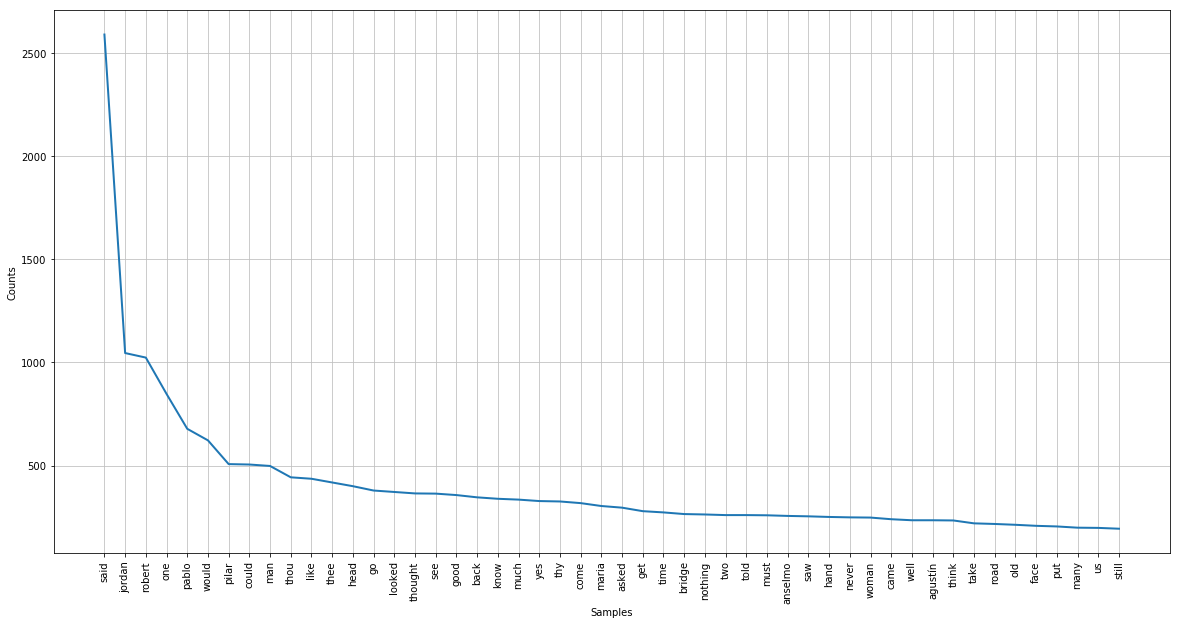

In [11]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [12]:
#順位チェック
sorted(freq_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('said', 2588),
 ('jordan', 1045),
 ('robert', 1023),
 ('one', 847),
 ('pablo', 678),
 ('would', 622),
 ('pilar', 507),
 ('could', 505),
 ('man', 498),
 ('thou', 443),
 ('like', 436),
 ('thee', 418),
 ('head', 400),
 ('go', 379),
 ('looked', 372),
 ('thought', 365),
 ('see', 364),
 ('good', 357),
 ('back', 346),
 ('know', 339),
 ('much', 335),
 ('yes', 328),
 ('thy', 326),
 ('come', 318),
 ('maria', 304),
 ('asked', 296),
 ('get', 279),
 ('time', 273),
 ('bridge', 265),
 ('nothing', 263),
 ('two', 260),
 ('told', 260),
 ('must', 259),
 ('anselmo', 256),
 ('saw', 254),
 ('hand', 251),
 ('never', 249),
 ('woman', 248),
 ('came', 240),
 ('well', 235),
 ('agustín', 235),
 ('think', 234),
 ('take', 220),
 ('road', 217),
 ('old', 213),
 ('face', 208),
 ('put', 205),
 ('many', 199),
 ('us', 198),
 ('still', 194),
 ('right', 193),
 ('gypsy', 188),
 ('let', 185),
 ('little', 180),
 ('make', 178),
 ('inglés', 175),
 ('way', 173),
 ('people', 173),
 ('sordo', 171),
 ('went', 167),
 ('another', 1

In [13]:
#Turn all words to basic form
basic_form = [ps.stem(word) for word in tokens_low if not word in stopwords + symbols]

In [14]:
#Textを使うためにreviewをlistにぶち込む
basic_form = [basic_form]

In [15]:
#原型に戻した単語で、再び文を再構築する。
text = []
for i in basic_form:
    text.append(nltk.Text(i))
    
text

[<Text: lay flat brown pine-needl floor forest chin fold...>]

In [16]:
#Textからwords listを作る。
for i in text:
    words = [word for word in i]
    
words

['lay',
 'flat',
 'brown',
 'pine-needl',
 'floor',
 'forest',
 'chin',
 'fold',
 'arm',
 'high',
 'overhead',
 'wind',
 'blew',
 'top',
 'pine',
 'tree',
 'mountainsid',
 'slope',
 'gentli',
 'lay',
 'steep',
 'could',
 'see',
 'dark',
 'oil',
 'road',
 'wind',
 'pass',
 'stream',
 'alongsid',
 'road',
 'far',
 'pass',
 'saw',
 'mill',
 'besid',
 'stream',
 'fall',
 'water',
 'dam',
 'white',
 'summer',
 'sunlight',
 'mill',
 'ask',
 'yes.',
 'rememb',
 'it.',
 'built',
 'sinc',
 'old',
 'mill',
 'farther',
 'much',
 'pass.',
 'spread',
 'photost',
 'militari',
 'map',
 'forest',
 'floor',
 'look',
 'care',
 'old',
 'man',
 'look',
 'shoulder',
 'short',
 'solid',
 'old',
 'man',
 'black',
 'peasant',
 'smock',
 'gray',
 'iron-stiff',
 'trouser',
 'wore',
 'rope-sol',
 'shoe',
 'breath',
 'heavili',
 'climb',
 'hand',
 'rest',
 'one',
 'two',
 'heavi',
 'pack',
 'carri',
 'see',
 'bridg',
 'here.',
 'old',
 'man',
 'said',
 'easi',
 'countri',
 'pass',
 'stream',
 'flow',
 'gentli',
 

In [17]:
#文章を小文字化
sentence_small = [w.lower() for w in sentence1]
sentence_small

['he lay flat on the brown, pine-needled floor of the forest, his chin on his folded arms, and high overhead the wind blew in the tops of the pine trees.',
 'the mountainside sloped gently where he lay; but below it was steep and he could see the dark of the oiled road winding through the pass.',
 'there was a stream alongside the road and far down the pass he saw a mill beside the stream and the falling water of the dam, white in the summer sunlight.',
 '“is that the mill?” he asked.',
 '“yes.”\n\n“i do not remember it.”\n\n“it was built since you were here.',
 'the old mill is farther down; much below the pass.”\n\nhe spread the photostated military map out on the forest floor and looked at it carefully.',
 'the old man looked over his shoulder.',
 'he was a short and solid old man in a black peasant’s smock and gray iron-stiff trousers and he wore rope-soled shoes.',
 'he was breathing heavily from the climb and his hand rested on one of the two heavy packs they had been carrying.',

In [18]:
#いけそう。文ごとに取り出し、それぞれの単語を原型に戻す。それを再び再構築する！
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    print (form)

['lay', 'flat', 'brown,', 'pine-needl', 'floor', 'forest,', 'chin', 'fold', 'arms,', 'high', 'overhead', 'wind', 'blew', 'top', 'pine', 'trees.']
['mountainsid', 'slope', 'gentli', 'lay;', 'steep', 'could', 'see', 'dark', 'oil', 'road', 'wind', 'pass.']
['stream', 'alongsid', 'road', 'far', 'pass', 'saw', 'mill', 'besid', 'stream', 'fall', 'water', 'dam,', 'white', 'summer', 'sunlight.']
['“i', 'mill?”', 'asked.']
['“yes.”', '“i', 'rememb', 'it.”', '“it', 'built', 'sinc', 'here.']
['old', 'mill', 'farther', 'down;', 'much', 'pass.”', 'spread', 'photost', 'militari', 'map', 'forest', 'floor', 'look', 'carefully.']
['old', 'man', 'look', 'shoulder.']
['short', 'solid', 'old', 'man', 'black', 'peasant’', 'smock', 'gray', 'iron-stiff', 'trouser', 'wore', 'rope-sol', 'shoes.']
['breath', 'heavili', 'climb', 'hand', 'rest', 'one', 'two', 'heavi', 'pack', 'carrying.']
['“then', 'cannot', 'see', 'bridg', 'here.”', '“no,”', 'old', 'man', 'said.']
['“thi', 'easi', 'countri', 'pass', 'stream', 'f

In [19]:
#上の本番
form_sent = []
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    form_sent.append(" ".join(form))

In [20]:
#ピリオドやカンマを消しまーす。Delte period and comma...めんどい...
form_sent2 = []

for i in form_sent:
    tokens = nltk.word_tokenize(i)
    form = [word for word in tokens if not word in stopwords + symbols]
    form_sent2.append(" ".join(form))
    

In [21]:
#次にこの新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化したい
text = []

for i in form_sent2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        text.append(j)

In [22]:
text = [text]

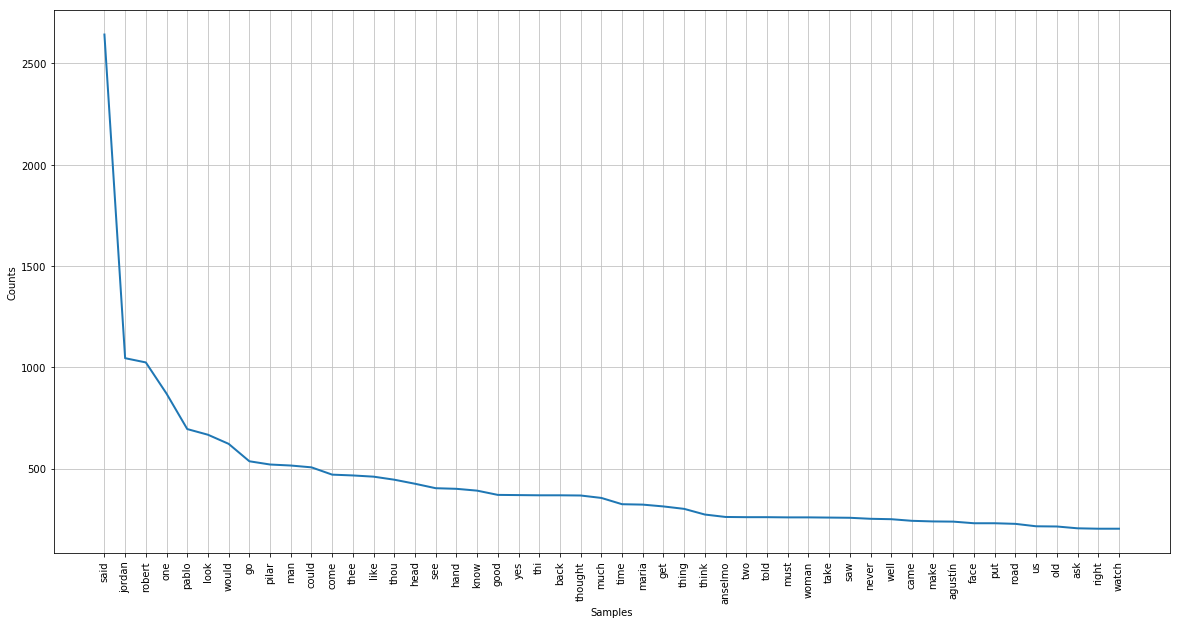

In [23]:
#新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

f_list_new = []
for i in text:
    f_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in f_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

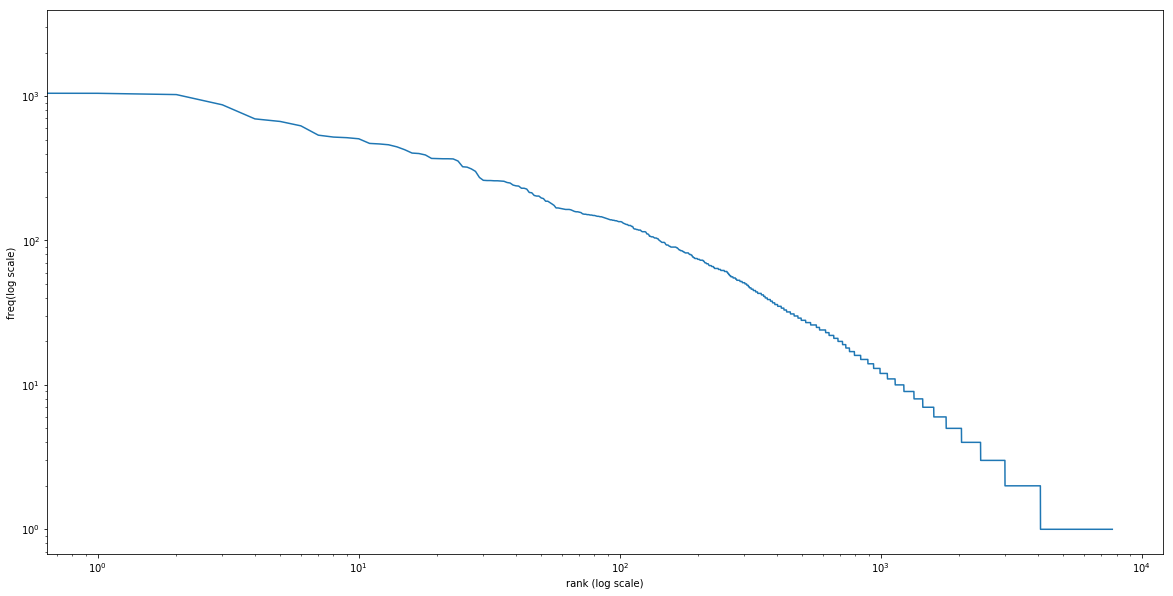

In [24]:
log_freq  = []
for i in f_list_new[0].values():
    log_freq.append(i)
    
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_freq, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('freq(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

In [25]:
#順位チェック
sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('said', 2643),
 ('jordan', 1045),
 ('robert', 1024),
 ('one', 870),
 ('pablo', 695),
 ('look', 667),
 ('would', 622),
 ('go', 536),
 ('pilar', 520),
 ('man', 515),
 ('could', 506),
 ('come', 470),
 ('thee', 466),
 ('like', 460),
 ('thou', 445),
 ('head', 425),
 ('see', 403),
 ('hand', 400),
 ('know', 391),
 ('good', 370),
 ('yes', 369),
 ('thi', 368),
 ('back', 368),
 ('thought', 367),
 ('much', 355),
 ('time', 324),
 ('maria', 322),
 ('get', 313),
 ('thing', 301),
 ('think', 273),
 ('anselmo', 261),
 ('two', 260),
 ('told', 260),
 ('must', 259),
 ('woman', 259),
 ('take', 258),
 ('saw', 257),
 ('never', 252),
 ('well', 250),
 ('came', 242),
 ('make', 239),
 ('agustín', 238),
 ('face', 230),
 ('put', 230),
 ('road', 227),
 ('us', 215),
 ('old', 214),
 ('ask', 205),
 ('right', 203),
 ('watch', 203),
 ('say', 197),
 ('still', 195),
 ('let', 187),
 ('kill', 187),
 ('way', 183),
 ('sordo', 179),
 ('mani', 175),
 ('tell', 168),
 ('gypsi', 168),
 ('went', 167),
 ('men', 166),
 ('long', 165

In [26]:
# let's make new list only with words whose frequency  > 100

moreThan100_freq = []

for i,j in f_list_new[0].items():
    if j >= 100:
        moreThan100_freq.append(i)

In [27]:
# 頻出単語top2のgameshとsaidが同時に現れる文を、ピックアップしカウントするプログラムを全ての単語に割り当てる試み。

count_s = {}

for wn1 in range(0, len(moreThan100_freq)-1):
    for wn2 in range(wn1+1, len(moreThan100_freq)):
        s = 0
    
        for sent in form_sent2:
            index1 = 0
            index2 = 0
            
            #remove duplicate
            if moreThan100_freq[wn1] != moreThan100_freq[wn2]:
                
                if moreThan100_freq[wn1] in sent.split():
                    index1 += 1
                if moreThan100_freq[wn2] in sent.split():
                    index2 += 1
              
                if index1 > 0 and index2 > 0:
                    s += 1
                
        count_s.update({( moreThan100_freq[wn1], moreThan100_freq[wn2]) :s })
        

In [28]:
count_s

{('lay', 'could'): 9,
 ('lay', 'see'): 5,
 ('lay', 'dark'): 2,
 ('lay', 'road'): 10,
 ('lay', 'pass'): 7,
 ('lay', 'saw'): 1,
 ('lay', 'asked'): 0,
 ('lay', 'yes'): 1,
 ('lay', 'old'): 3,
 ('lay', 'much'): 3,
 ('lay', 'look'): 14,
 ('lay', 'man'): 9,
 ('lay', 'shoulder'): 5,
 ('lay', 'hand'): 18,
 ('lay', 'one'): 11,
 ('lay', 'two'): 7,
 ('lay', 'bridg'): 2,
 ('lay', 'said'): 17,
 ('lay', 'thi'): 8,
 ('lay', 'turn'): 6,
 ('lay', 'across'): 8,
 ('lay', 'bridge'): 3,
 ('lay', 'took'): 3,
 ('lay', 'around'): 5,
 ('lay', 'show'): 0,
 ('lay', 'behind'): 15,
 ('lay', 'open'): 3,
 ('lay', 'blow'): 2,
 ('lay', 'come'): 9,
 ('lay', 'line'): 1,
 ('lay', 'would'): 12,
 ('lay', 'mani'): 1,
 ('lay', 'men'): 4,
 ('lay', 'alway'): 2,
 ('lay', 'get'): 4,
 ('lay', 'wish'): 0,
 ('lay', 'let'): 6,
 ('lay', 'know'): 3,
 ('lay', 'go'): 7,
 ('lay', 'time'): 5,
 ('lay', 'like'): 4,
 ('lay', 'must'): 2,
 ('lay', 'littl'): 1,
 ('lay', 'bad'): 1,
 ('lay', 'anselmo'): 7,
 ('lay', 'face'): 6,
 ('lay', 'put'): 9,


In [29]:
#順位チェック
sorted(count_s.items(), key=lambda x: x[1], reverse=True)

[(('robert', 'jordan'), 1016),
 (('said', 'jordan'), 463),
 (('said', 'robert'), 460),
 (('said', 'pablo'), 306),
 (('said', 'pilar'), 287),
 (('one', 'said'), 152),
 (('said', 'thou'), 152),
 (('said', 'go'), 147),
 (('said', 'thi'), 146),
 (('said', 'maria'), 140),
 (('man', 'said'), 135),
 (('said', 'thee'), 134),
 (('said', 'agustín'), 133),
 (('said', 'would'), 128),
 (('yes', 'said'), 124),
 (('look', 'said'), 124),
 (('said', 'woman'), 123),
 (('look', 'robert'), 114),
 (('look', 'jordan'), 114),
 (('said', 'like'), 107),
 (('said', 'anselmo'), 107),
 (('could', 'see'), 103),
 (('said', 'good'), 103),
 (('old', 'man'), 100),
 (('see', 'said'), 89),
 (('could', 'said'), 85),
 (('said', 'gypsi'), 85),
 (('said', 'know'), 84),
 (('said', 'come'), 79),
 (('much', 'said'), 78),
 (('said', 'take'), 77),
 (('hand', 'robert'), 76),
 (('hand', 'jordan'), 76),
 (('said', 'let'), 76),
 (('said', 'us'), 76),
 (('said', 'get'), 75),
 (('robert', 'thought'), 75),
 (('jordan', 'thought'), 75),

In [30]:
#namely

new = {tuple(sorted(x)):y for x, y in count_s.items()}

In [31]:
#順位チェック again !
new2 = dict(sorted(new.items(), key=lambda x: x[1], reverse=True))
new2

{('jordan', 'robert'): 1016,
 ('jordan', 'said'): 463,
 ('robert', 'said'): 460,
 ('pablo', 'said'): 306,
 ('pilar', 'said'): 287,
 ('one', 'said'): 152,
 ('said', 'thou'): 152,
 ('go', 'said'): 147,
 ('said', 'thi'): 146,
 ('maria', 'said'): 140,
 ('man', 'said'): 135,
 ('said', 'thee'): 134,
 ('agustín', 'said'): 133,
 ('said', 'would'): 128,
 ('said', 'yes'): 124,
 ('look', 'said'): 124,
 ('said', 'woman'): 123,
 ('look', 'robert'): 114,
 ('jordan', 'look'): 114,
 ('like', 'said'): 107,
 ('anselmo', 'said'): 107,
 ('could', 'see'): 103,
 ('good', 'said'): 103,
 ('man', 'old'): 100,
 ('said', 'see'): 89,
 ('could', 'said'): 85,
 ('gypsi', 'said'): 85,
 ('know', 'said'): 84,
 ('come', 'said'): 79,
 ('much', 'said'): 78,
 ('said', 'take'): 77,
 ('hand', 'robert'): 76,
 ('hand', 'jordan'): 76,
 ('let', 'said'): 76,
 ('said', 'us'): 76,
 ('get', 'said'): 75,
 ('robert', 'thought'): 75,
 ('jordan', 'thought'): 75,
 ('let', 'us'): 69,
 ('jordan', 'one'): 68,
 ('hand', 'put'): 67,
 ('head',

In [32]:
new3 = dict((k, v) for k, v in new2.items() if v >= 2)
new3

{('jordan', 'robert'): 1016,
 ('jordan', 'said'): 463,
 ('robert', 'said'): 460,
 ('pablo', 'said'): 306,
 ('pilar', 'said'): 287,
 ('one', 'said'): 152,
 ('said', 'thou'): 152,
 ('go', 'said'): 147,
 ('said', 'thi'): 146,
 ('maria', 'said'): 140,
 ('man', 'said'): 135,
 ('said', 'thee'): 134,
 ('agustín', 'said'): 133,
 ('said', 'would'): 128,
 ('said', 'yes'): 124,
 ('look', 'said'): 124,
 ('said', 'woman'): 123,
 ('look', 'robert'): 114,
 ('jordan', 'look'): 114,
 ('like', 'said'): 107,
 ('anselmo', 'said'): 107,
 ('could', 'see'): 103,
 ('good', 'said'): 103,
 ('man', 'old'): 100,
 ('said', 'see'): 89,
 ('could', 'said'): 85,
 ('gypsi', 'said'): 85,
 ('know', 'said'): 84,
 ('come', 'said'): 79,
 ('much', 'said'): 78,
 ('said', 'take'): 77,
 ('hand', 'robert'): 76,
 ('hand', 'jordan'): 76,
 ('let', 'said'): 76,
 ('said', 'us'): 76,
 ('get', 'said'): 75,
 ('robert', 'thought'): 75,
 ('jordan', 'thought'): 75,
 ('let', 'us'): 69,
 ('jordan', 'one'): 68,
 ('hand', 'put'): 67,
 ('head',

In [33]:
#順位チェック again !
new4 = dict(sorted(new3.items(), key=lambda x: x[1], reverse=True))
new4

{('jordan', 'robert'): 1016,
 ('jordan', 'said'): 463,
 ('robert', 'said'): 460,
 ('pablo', 'said'): 306,
 ('pilar', 'said'): 287,
 ('one', 'said'): 152,
 ('said', 'thou'): 152,
 ('go', 'said'): 147,
 ('said', 'thi'): 146,
 ('maria', 'said'): 140,
 ('man', 'said'): 135,
 ('said', 'thee'): 134,
 ('agustín', 'said'): 133,
 ('said', 'would'): 128,
 ('said', 'yes'): 124,
 ('look', 'said'): 124,
 ('said', 'woman'): 123,
 ('look', 'robert'): 114,
 ('jordan', 'look'): 114,
 ('like', 'said'): 107,
 ('anselmo', 'said'): 107,
 ('could', 'see'): 103,
 ('good', 'said'): 103,
 ('man', 'old'): 100,
 ('said', 'see'): 89,
 ('could', 'said'): 85,
 ('gypsi', 'said'): 85,
 ('know', 'said'): 84,
 ('come', 'said'): 79,
 ('much', 'said'): 78,
 ('said', 'take'): 77,
 ('hand', 'robert'): 76,
 ('hand', 'jordan'): 76,
 ('let', 'said'): 76,
 ('said', 'us'): 76,
 ('get', 'said'): 75,
 ('robert', 'thought'): 75,
 ('jordan', 'thought'): 75,
 ('let', 'us'): 69,
 ('jordan', 'one'): 68,
 ('hand', 'put'): 67,
 ('head',

In [34]:
pair_freq = []
for i,j in new4.items():
    pair_freq.append(j)
    
sorted(pair_freq, reverse=True)

[1016,
 463,
 460,
 306,
 287,
 152,
 152,
 147,
 146,
 140,
 135,
 134,
 133,
 128,
 124,
 124,
 123,
 114,
 114,
 107,
 107,
 103,
 103,
 100,
 89,
 85,
 85,
 84,
 79,
 78,
 77,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 69,
 68,
 67,
 67,
 67,
 66,
 65,
 65,
 65,
 64,
 63,
 63,
 63,
 59,
 58,
 58,
 58,
 57,
 57,
 56,
 55,
 55,
 55,
 54,
 53,
 53,
 52,
 52,
 52,
 52,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 45,
 45,
 45,
 45,
 45,
 45,
 44,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,


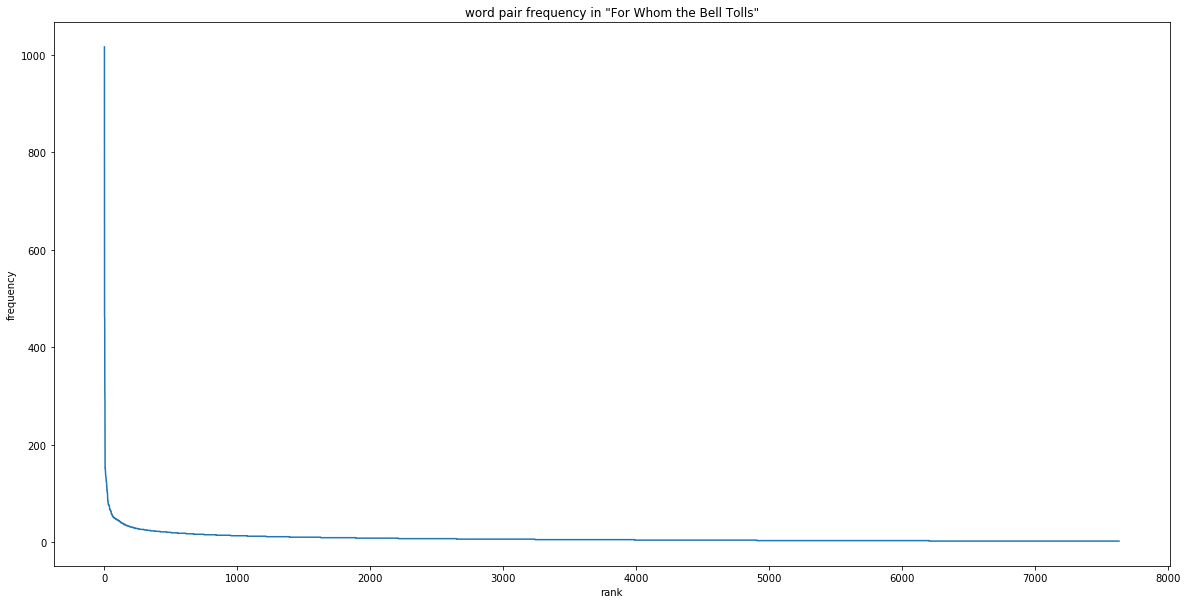

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(pair_freq, reverse=True))

plt.ylabel('frequency')
plt.xlabel('rank')
plt.title('word pair frequency in "For Whom the Bell Tolls"')
plt.show()

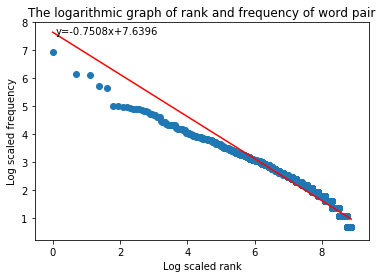

In [64]:
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(pair_freq, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(pair_freq)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
ax.set_title('The logarithmic graph of rank and frequency of word pair')
ax.set_xlabel('Log scaled rank')
ax.set_ylabel('Log scaled frequency')

#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

In [37]:
#単語順位チェック
word_f = sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)
word_f

[('said', 2643),
 ('jordan', 1045),
 ('robert', 1024),
 ('one', 870),
 ('pablo', 695),
 ('look', 667),
 ('would', 622),
 ('go', 536),
 ('pilar', 520),
 ('man', 515),
 ('could', 506),
 ('come', 470),
 ('thee', 466),
 ('like', 460),
 ('thou', 445),
 ('head', 425),
 ('see', 403),
 ('hand', 400),
 ('know', 391),
 ('good', 370),
 ('yes', 369),
 ('thi', 368),
 ('back', 368),
 ('thought', 367),
 ('much', 355),
 ('time', 324),
 ('maria', 322),
 ('get', 313),
 ('thing', 301),
 ('think', 273),
 ('anselmo', 261),
 ('two', 260),
 ('told', 260),
 ('must', 259),
 ('woman', 259),
 ('take', 258),
 ('saw', 257),
 ('never', 252),
 ('well', 250),
 ('came', 242),
 ('make', 239),
 ('agustín', 238),
 ('face', 230),
 ('put', 230),
 ('road', 227),
 ('us', 215),
 ('old', 214),
 ('ask', 205),
 ('right', 203),
 ('watch', 203),
 ('say', 197),
 ('still', 195),
 ('let', 187),
 ('kill', 187),
 ('way', 183),
 ('sordo', 179),
 ('mani', 175),
 ('tell', 168),
 ('gypsi', 168),
 ('went', 167),
 ('men', 166),
 ('long', 165

In [38]:
word_fdic = dict(word_f)
word_fdic

{'said': 2643,
 'jordan': 1045,
 'robert': 1024,
 'one': 870,
 'pablo': 695,
 'look': 667,
 'would': 622,
 'go': 536,
 'pilar': 520,
 'man': 515,
 'could': 506,
 'come': 470,
 'thee': 466,
 'like': 460,
 'thou': 445,
 'head': 425,
 'see': 403,
 'hand': 400,
 'know': 391,
 'good': 370,
 'yes': 369,
 'thi': 368,
 'back': 368,
 'thought': 367,
 'much': 355,
 'time': 324,
 'maria': 322,
 'get': 313,
 'thing': 301,
 'think': 273,
 'anselmo': 261,
 'two': 260,
 'told': 260,
 'must': 259,
 'woman': 259,
 'take': 258,
 'saw': 257,
 'never': 252,
 'well': 250,
 'came': 242,
 'make': 239,
 'agustín': 238,
 'face': 230,
 'put': 230,
 'road': 227,
 'us': 215,
 'old': 214,
 'ask': 205,
 'right': 203,
 'watch': 203,
 'say': 197,
 'still': 195,
 'let': 187,
 'kill': 187,
 'way': 183,
 'sordo': 179,
 'mani': 175,
 'tell': 168,
 'gypsi': 168,
 'went': 167,
 'men': 166,
 'long': 165,
 'turn': 164,
 'littl': 164,
 'hold': 164,
 'talk': 163,
 'hors': 161,
 'inglés': 159,
 'bridg': 158,
 'want': 158,
 'hea

In [39]:
count = 0
s_value = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    s_value.append(s)
    
    count += 1
    
    if count == 1000:
        break

In [40]:
count = 0
p_values = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    p = (word_fdic[i[0]]  * word_fdic[i[1]]) * s * s
    p_values.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [41]:
p_values

[0.964653110047847,
 0.07761551231292554,
 0.07818411842603103,
 0.05097542851076686,
 0.05993262318460956,
 0.010047794869118599,
 0.01964400345198468,
 0.015253612753485692,
 0.02191597163960585,
 0.023030482488608138,
 0.013389462548075333,
 0.014578959077261339,
 0.028120896485722552,
 0.009966264098699105,
 0.01576593896850811,
 0.00872208617598125,
 0.022101069774168525,
 0.019027595577211395,
 0.018645222843123893,
 0.009416999786145519,
 0.016597011117344594,
 0.05202581429790406,
 0.010848646603470668,
 0.09073586788857635,
 0.007436657907164296,
 0.005402442726629668,
 0.016271642974253642,
 0.006827860690740295,
 0.005024110255109844,
 0.0064843088040159235,
 0.008694899793809595,
 0.0141015625,
 0.013818181818181818,
 0.011686606331728853,
 0.010164629693178119,
 0.0067995633773703275,
 0.014967749489100816,
 0.014666962178793529,
 0.11841810720059695,
 0.005086069405488643,
 0.04879347826086956,
 0.003996349958825755,
 0.012581101722229229,
 0.015366434429843902,
 0.004742

In [42]:
max(p_values)

0.964653110047847

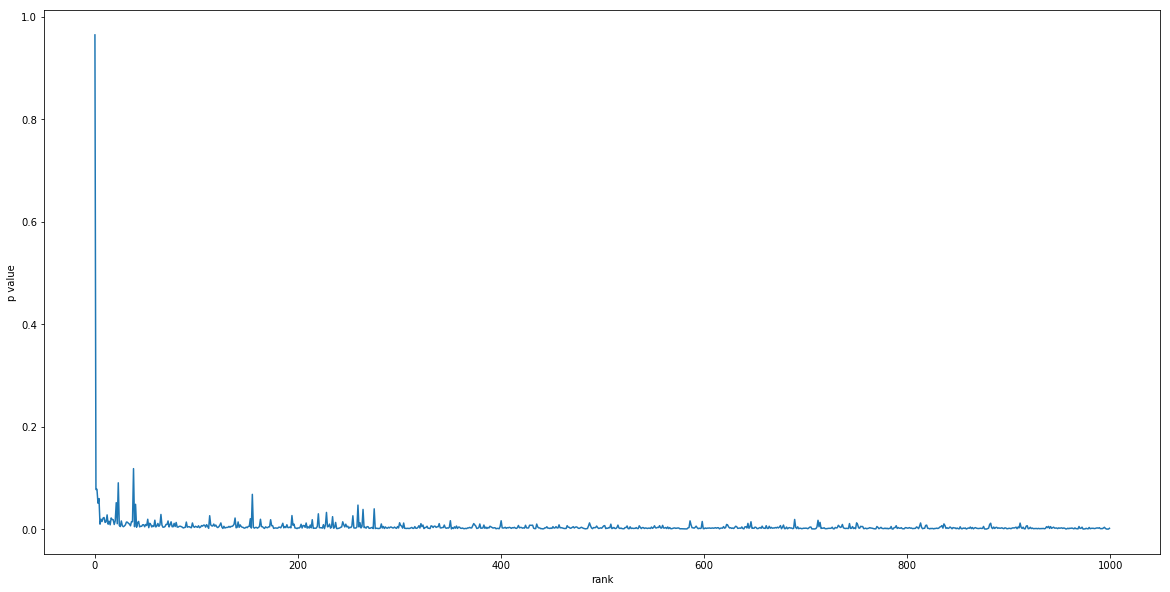

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(p_values)

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

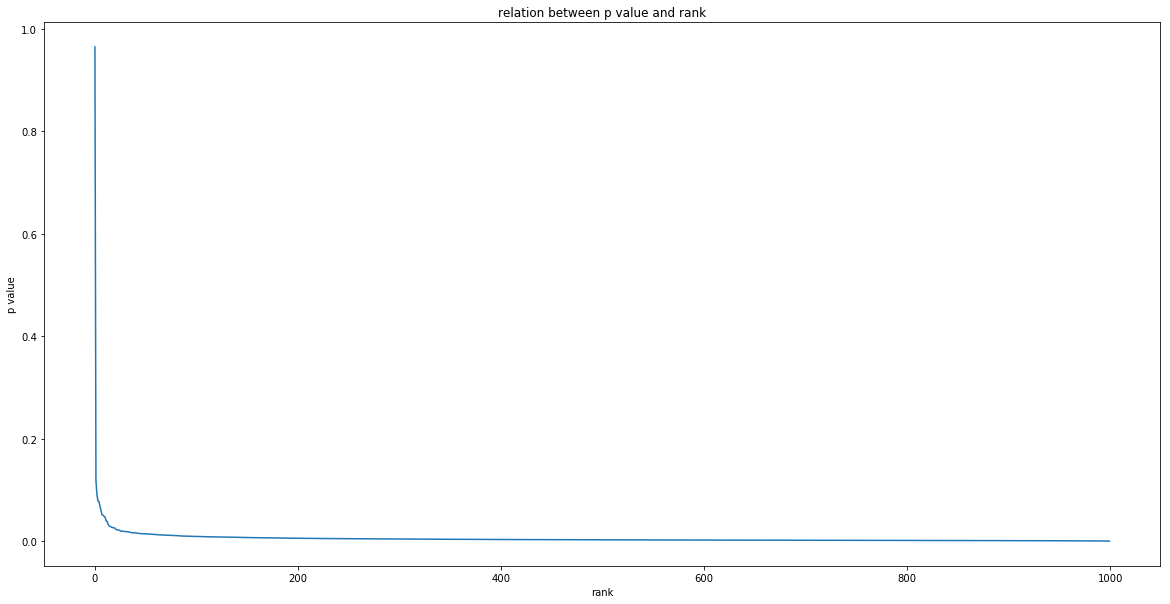

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.title('relation between p value and rank')
plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

In [46]:
s_value

[0.0009494617224880383,
 0.0001676360957082625,
 0.00016996547483919789,
 0.00016658636768224466,
 0.00020882447102651416,
 6.610391361262236e-05,
 0.00012923686481568867,
 0.00010376607315296389,
 0.0001501093947918209,
 0.000164503446347201,
 9.918120405981729e-05,
 0.00010879820206911446,
 0.00021143531192272595,
 7.786143827108676e-05,
 0.00012714466910087186,
 7.033940464501008e-05,
 0.0001796834940989311,
 0.00016690873313343328,
 0.00016355458634319204,
 8.800934379575252e-05,
 0.00015511225343312705,
 0.0005051049931835346,
 0.00010532666605311327,
 0.0009073586788857635,
 8.355795401308198e-05,
 6.355814972505492e-05,
 0.00019143109381474874,
 8.128405584214637e-05,
 6.359633234316259e-05,
 8.31321641540503e-05,
 0.00011292077654298176,
 0.000185546875,
 0.0001818181818181818,
 0.0001537711359438007,
 0.00013374512754181736,
 9.066084503160437e-05,
 0.0001995699931880109,
 0.00019555949571724705,
 0.0017162044521825644,
 7.479513831600946e-05,
 0.0007282608695652174,
 5.964701

In [47]:
print(max(s_value))
print(s_value.index(max(s_value)))
print(s_value[155])

0.001894736842105263
155
0.001894736842105263


In [48]:
count = 0
for i, j in new2.items():
    if count == 73:
        print(i,j)
    count += 1

('one', 'would') 50


In [49]:
for i,j in word_fdic.items():
    if i == 'one':
        print(i,j)
    elif i == 'would':
        print(i,j)

one 870
would 622


In [50]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

In [51]:
s_value_top_5 = sorted(s_value, reverse=True)[:6]
s_value_top_5

[0.001894736842105263,
 0.00174995139023916,
 0.0017162044521825644,
 0.0015379155329468827,
 0.0014364758459246647,
 0.0012012012012012011]

In [52]:
print(s_value.index(s_value_top_5[0]))
print(s_value.index(s_value_top_5[1]))
print(s_value.index(s_value_top_5[2]))
print(s_value.index(s_value_top_5[3]))
print(s_value.index(s_value_top_5[4]))

155
259
38
275
264


In [53]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[0]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'last':
        print(i,j)
    elif i ==  'night':
        print(i,j)

('last', 'night') 36
night 152
last 125


In [54]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[1]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'arm':
        print(i,j)
    elif i ==  'around':
        print(i,j)

('arm', 'around') 27
around 139
arm 111


In [55]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[2]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'let':
        print(i,j)
    elif i ==  'us':
        print(i,j)

('let', 'us') 69
us 215
let 187


In [56]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[3]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'blow':
        print(i,j)
    elif i ==  'bridge':
        print(i,j)

('blow', 'bridg') 26
bridge 134
blow 107


In [57]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[4]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'cave':
        print(i,j)
    elif i ==  'mouth':
        print(i,j)

('cave', 'mouth') 27
mouth 148
cave 127


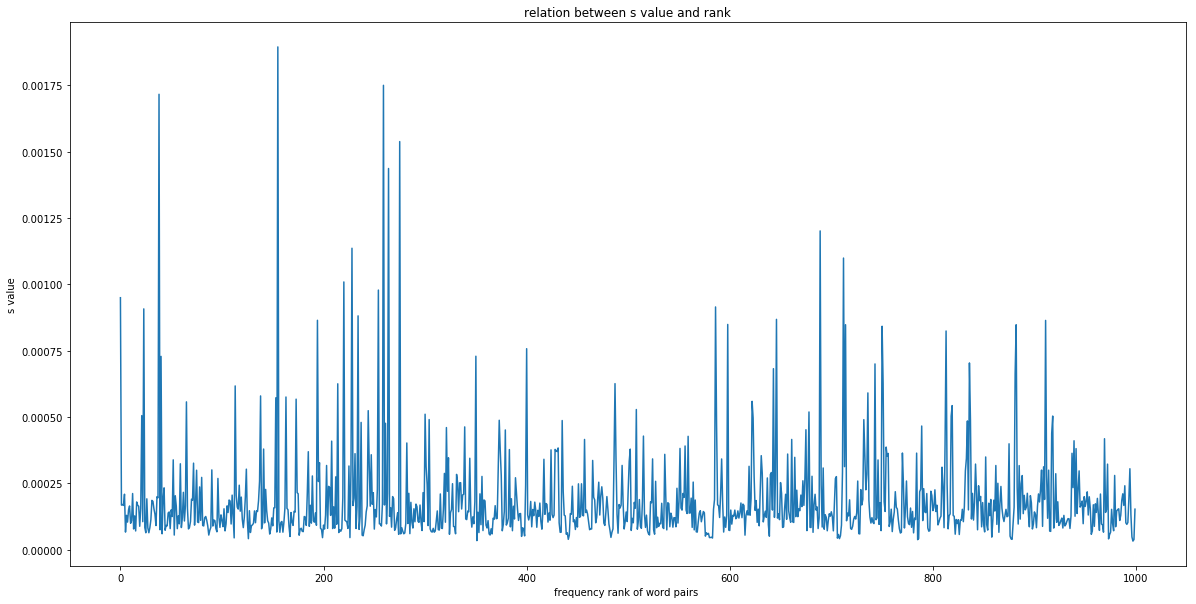

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(s_value)

plt.title('relation between s value and rank')
plt.ylabel('s value')
plt.xlabel('frequency rank of word pairs ')
plt.show()

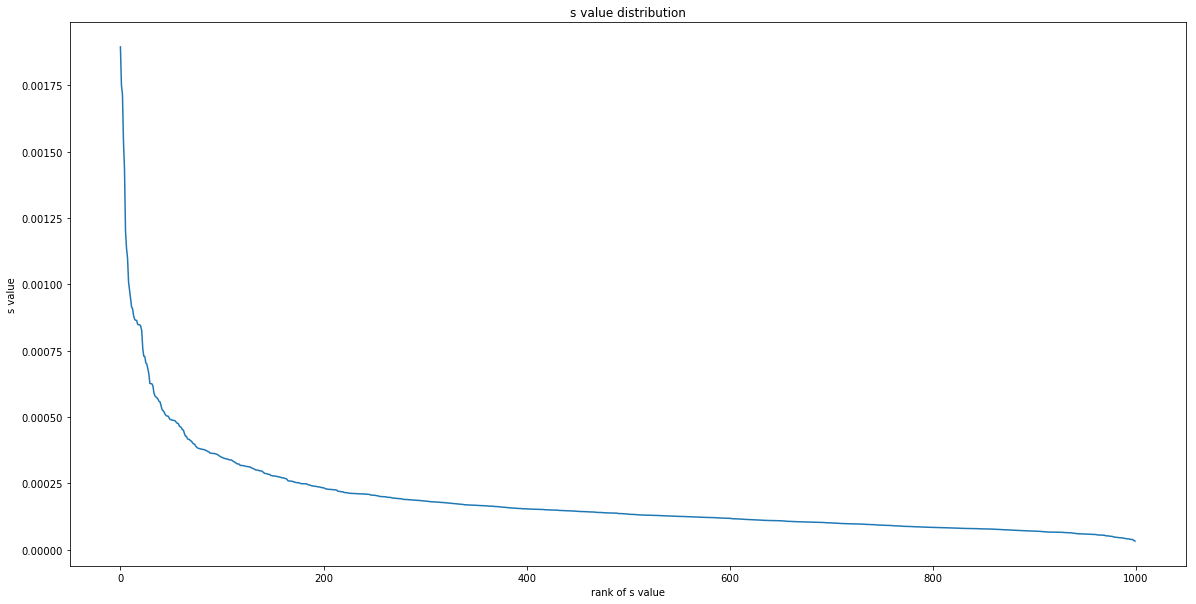

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))

plt.title('s value distribution')
plt.ylabel('s value')
plt.xlabel('rank of s value')
plt.show()

In [62]:
from math import log
log_list = [log(y,10) for y in s_value]
log_list

[-3.022522539138984,
 -3.77563246256083,
 -3.7696392880899476,
 -3.7783605412402443,
 -3.6802186100325165,
 -4.179772827805556,
 -3.8886135861678692,
 -3.983944618076304,
 -3.823592126020791,
 -3.783824999149303,
 -4.003570623677895,
 -3.9633782814569023,
 -3.674822479221136,
 -4.10867757817466,
 -3.8957018441285354,
 -4.152801311886024,
 -3.745491815773564,
 -3.777520939219888,
 -3.786337273027149,
 -4.0554712171280745,
 -3.8093538927847814,
 -3.296618338275736,
 -3.977461662493533,
 -3.0422210023903817,
 -4.078012202627907,
 -4.196828754257217,
 -3.71798751914328,
 -4.089994634465695,
 -4.196567929776986,
 -4.080230913496323,
 -3.9472261439224585,
 -3.7315463556869823,
 -3.740362689494243,
 -3.813125177387417,
 -3.8737220307665243,
 -4.042580237286459,
 -3.6999047575002013,
 -3.708721091307462,
 -2.7654309757148487,
 -4.126126630359455,
 -3.1377130246447287,
 -4.2244112904811955,
 -3.72635612892589,
 -3.6329708284249915,
 -4.136905852615574,
 -4.03937140458707,
 -4.04818773839433,
 -

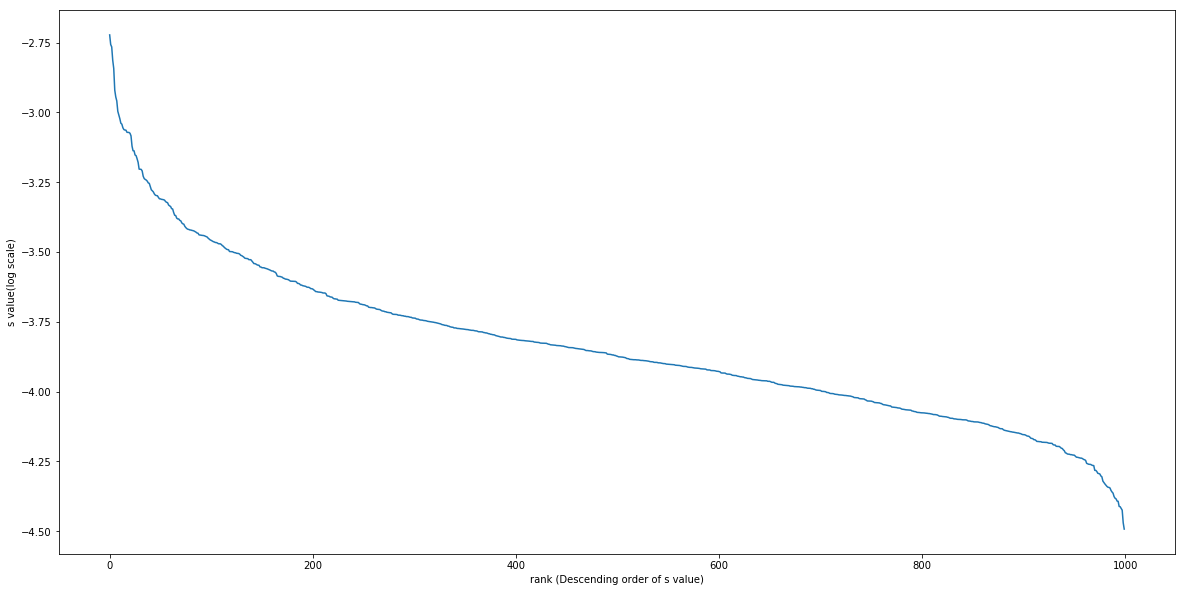

In [63]:
#take a log
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_list, reverse=True))

plt.ylabel('s value(log scale)')
plt.xlabel('rank (Descending order of s value)')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


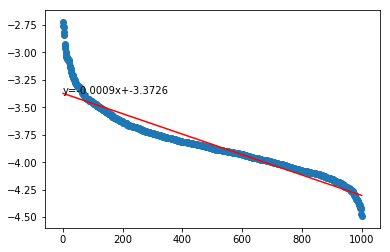

In [67]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(log_list)+1)
y = sorted(log_list, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

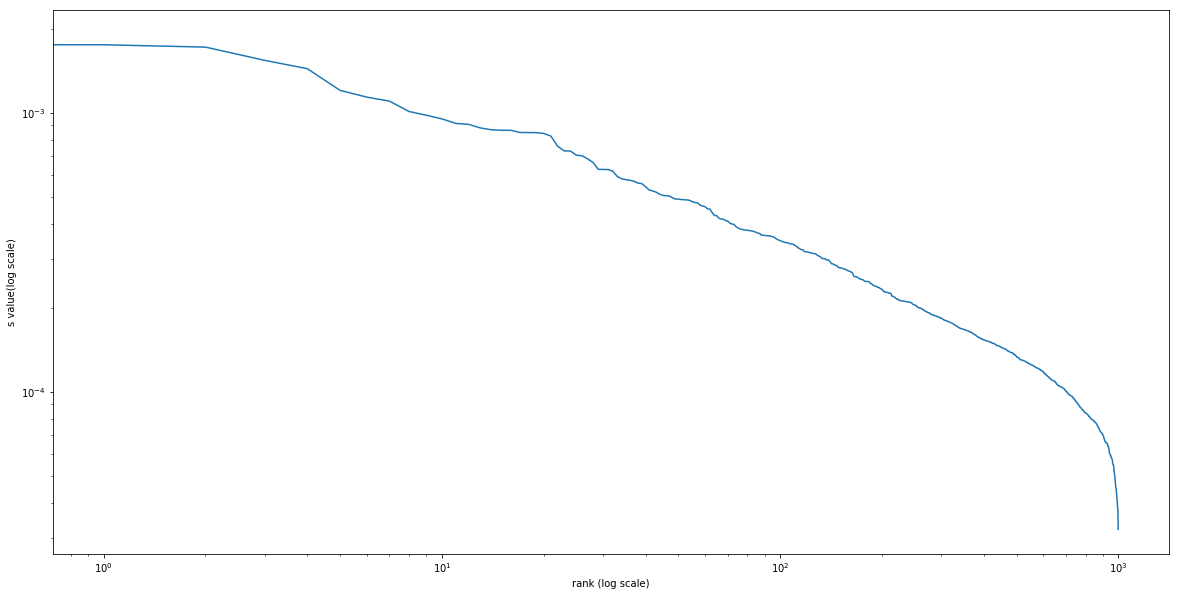

In [68]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('s value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

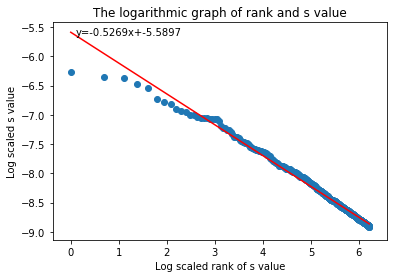

In [65]:
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_value, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_value)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)

ax.set_title('The logarithmic graph of rank and s value')
ax.set_xlabel('Log scaled rank of s value')
ax.set_ylabel('Log scaled s value')
#plt.figure(figsize=(20,10))
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

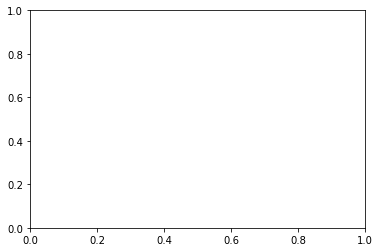

In [66]:
#take a log log graph
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(list1)+1)
y = sorted(list1, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)


In [ ]:
# i,j count
import numpy as np

len(word_f)

In [ ]:
i = np.arange(len(word_f), 0, -1)
j = np.arange(1,len(word_f)+1, 1)

In [67]:
def square(list):
    return [i ** -2 for i in list]
square(i)

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [68]:
meddle = len(square(j)) / 2
print(meddle)

meddle = len(square(i)) / 2
print (meddle)

TypeError: 'int' object is not iterable

In [69]:
square(j)[3855]

TypeError: 'int' object is not iterable

In [70]:
plt.plot(square(i), square(j))

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [71]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (3855**2) / (x)

myu = integrate.quad(computePi, 1, 3855**2)

In [72]:
# 結果にはintegrated value and estimation error
myu

(245418720.3287299, 0.010041374452661955)

In [73]:
(3855**2) * log(3855**2)

245418720.3287299

# Try square

In [74]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (1.3636492563202415e-07**2) / (x)

myu = integrate.quad(computePi, 1, (1.3636492563202415e-07**2))
print(myu)

(-1.563087078650155e-13, 1.738773443706648e-13)


In [75]:
p_values

[0.964653110047847,
 0.07761551231292554,
 0.07818411842603103,
 0.05097542851076686,
 0.05993262318460956,
 0.010047794869118599,
 0.01964400345198468,
 0.015253612753485692,
 0.02191597163960585,
 0.023030482488608138,
 0.013389462548075333,
 0.014578959077261339,
 0.028120896485722552,
 0.009966264098699105,
 0.01576593896850811,
 0.00872208617598125,
 0.022101069774168525,
 0.019027595577211395,
 0.018645222843123893,
 0.009416999786145519,
 0.016597011117344594,
 0.05202581429790406,
 0.010848646603470668,
 0.09073586788857635,
 0.007436657907164296,
 0.005402442726629668,
 0.016271642974253642,
 0.006827860690740295,
 0.005024110255109844,
 0.0064843088040159235,
 0.008694899793809595,
 0.0141015625,
 0.013818181818181818,
 0.011686606331728853,
 0.010164629693178119,
 0.0067995633773703275,
 0.014967749489100816,
 0.014666962178793529,
 0.11841810720059695,
 0.005086069405488643,
 0.04879347826086956,
 0.003996349958825755,
 0.012581101722229229,
 0.015366434429843902,
 0.004742

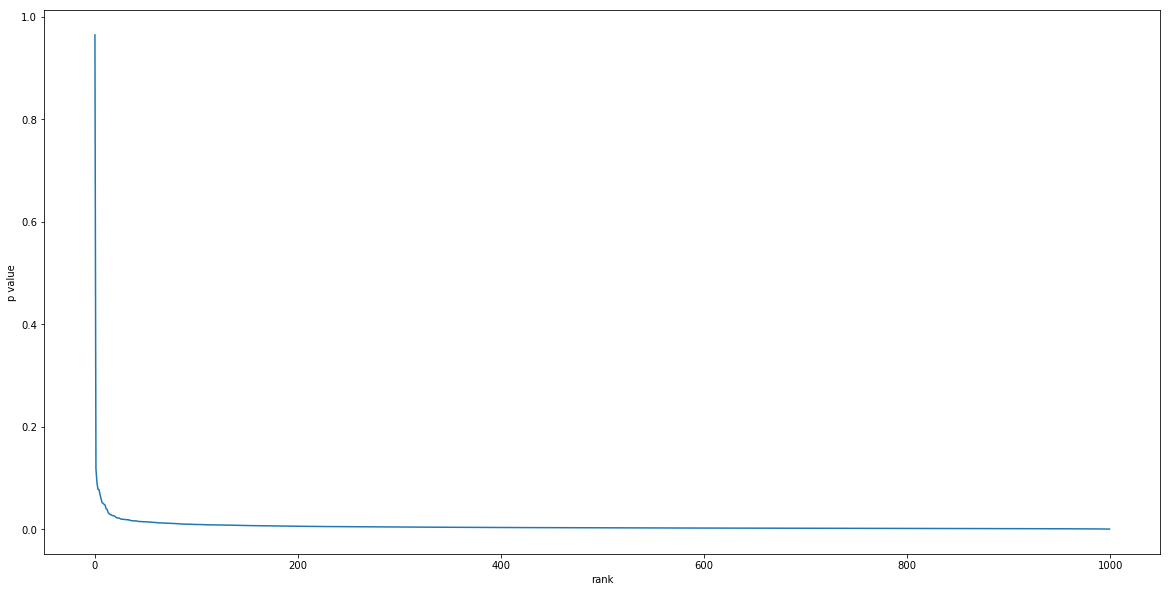

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

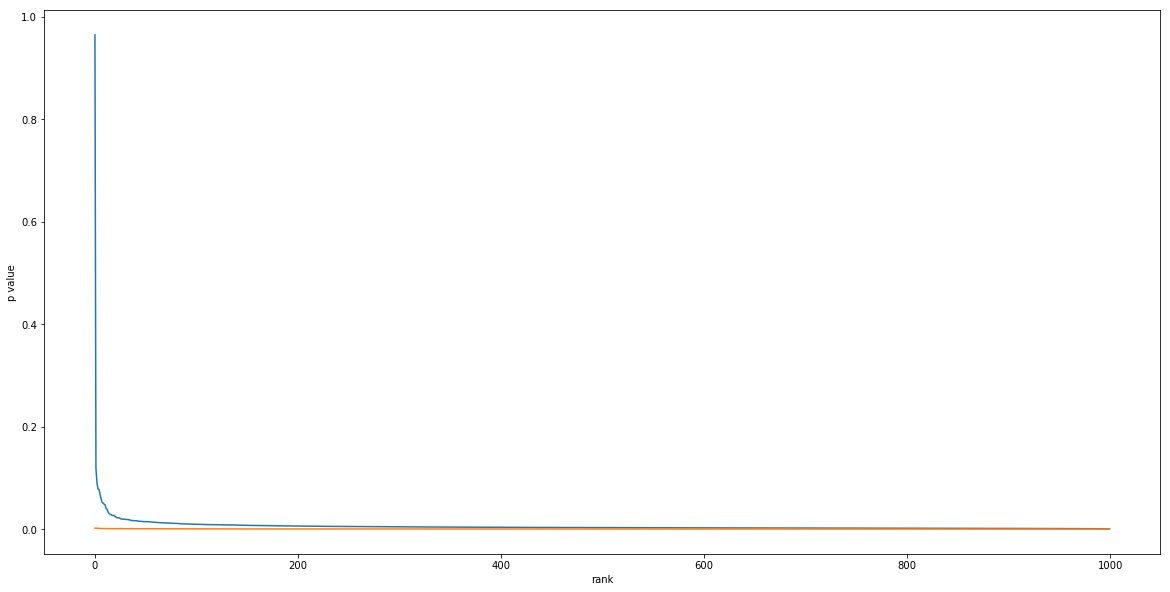

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))
plt.plot(sorted(s_value, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

# 1/2, 1/3, 2/3

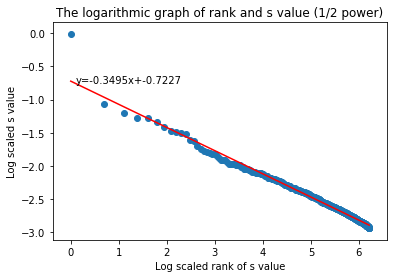

In [81]:
count = 0
s_values_1_2 = []

for i, j in new2.items():
    #print (i)
    
    s = j / math.pow((word_fdic[i[0]]  * word_fdic[i[1]]), (1.0/2.0))
    s_values_1_2.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_values_1_2, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_values_1_2)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)

ax.set_title('The logarithmic graph of rank and s value (1/2 power)')
ax.set_xlabel('Log scaled rank of s value')
ax.set_ylabel('Log scaled s value')
#plt.figure(figsize=(20,10))
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

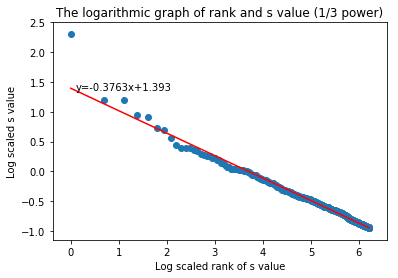

In [79]:
count = 0
s_values_1_3 = []

for i, j in new2.items():
    #print (i)
    
    s = j / math.pow((word_fdic[i[0]]  * word_fdic[i[1]]), (1.0/3.0))
    s_values_1_3.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_values_1_3, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_values_1_3)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)

ax.set_title('The logarithmic graph of rank and s value (1/3 power)')
ax.set_xlabel('Log scaled rank of s value')
ax.set_ylabel('Log scaled s value')
#plt.figure(figsize=(20,10))
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

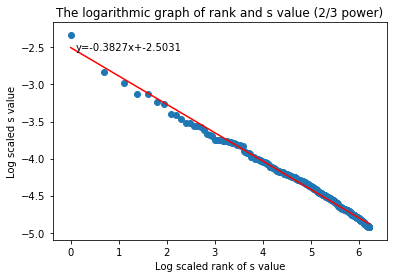

In [80]:
count = 0
s_values_2_3 = []

for i, j in new2.items():
    #print (i)
    
    s = j / math.pow((word_fdic[i[0]]  * word_fdic[i[1]]), (2.0/3.0))
    s_values_2_3.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_values_2_3, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_values_2_3)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)

ax.set_title('The logarithmic graph of rank and s value (2/3 power)')
ax.set_xlabel('Log scaled rank of s value')
ax.set_ylabel('Log scaled s value')
#plt.figure(figsize=(20,10))
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()